In [39]:
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import pandas as pd
import json
import numpy as np
import os
import cv2
import warning
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
df = pd.read_csv('./train.csv')
with open('label_num_to_disease_map.json','r') as f:
    label_map=json.load(f)
column_names=list(label_map.keys())        

# Specify the fraction of the dataset you want to use (e.g., 20%)
subset_fraction = 0.1
df_subset = df.sample(frac=subset_fraction, random_state=42)  # Randomly select 20% of the dataset
Img_size=128
# Extract image paths and labels
image_paths = [os.path.join('./train_images', img) for img in df_subset['image_id'].values]  # Full paths
labels = df_subset['label'].values
#print(labels[40:80])
#print(df_subset)


In [21]:
#img = cv2.imread("./train_images/2001457610.jpg")  # Ensure the filename is correct
#img_resized=cv2.resize(img,(256,256))
#cv2.imshow("image",img_resized)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

Evaluating KNN Model:
Accuracy: 0.1916
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        18
           1       0.05      0.52      0.10        29
           2       0.00      0.00      0.00        54
           3       0.65      0.22      0.33       282
           4       0.11      0.09      0.10        45

    accuracy                           0.19       428
   macro avg       0.16      0.17      0.11       428
weighted avg       0.44      0.19      0.24       428



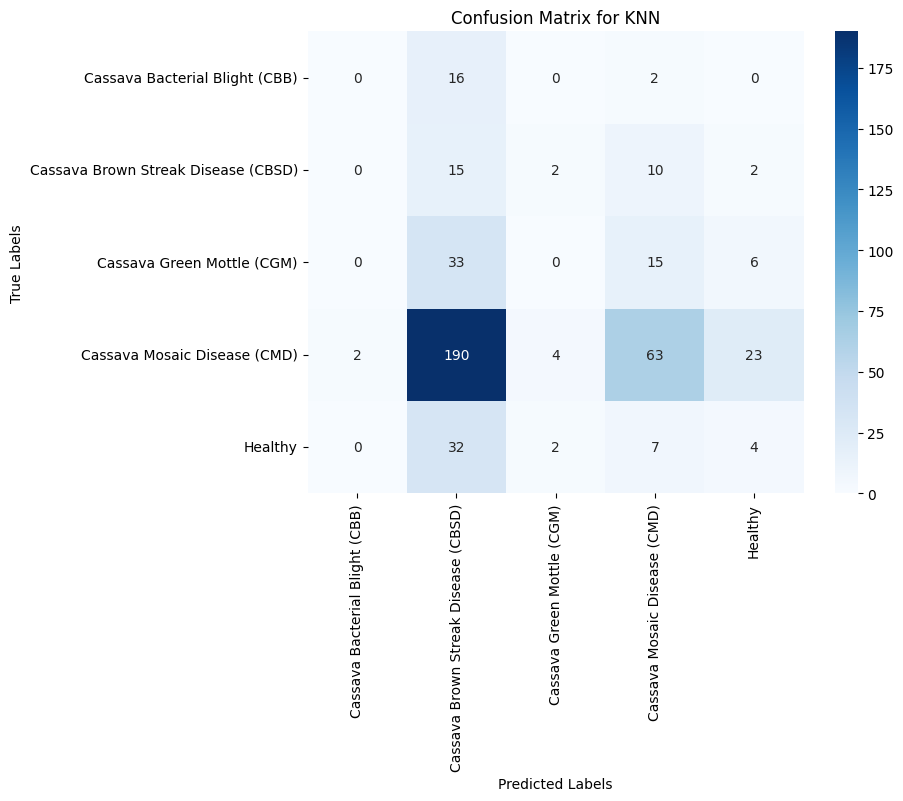


Evaluating Random Forest Model:
Accuracy: 0.6589
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00        18
           1       1.00      0.03      0.07        29
           2       1.00      0.00      0.00        54
           3       0.66      1.00      0.79       282
           4       0.00      0.00      0.00        45

    accuracy                           0.66       428
   macro avg       0.73      0.21      0.17       428
weighted avg       0.67      0.66      0.53       428



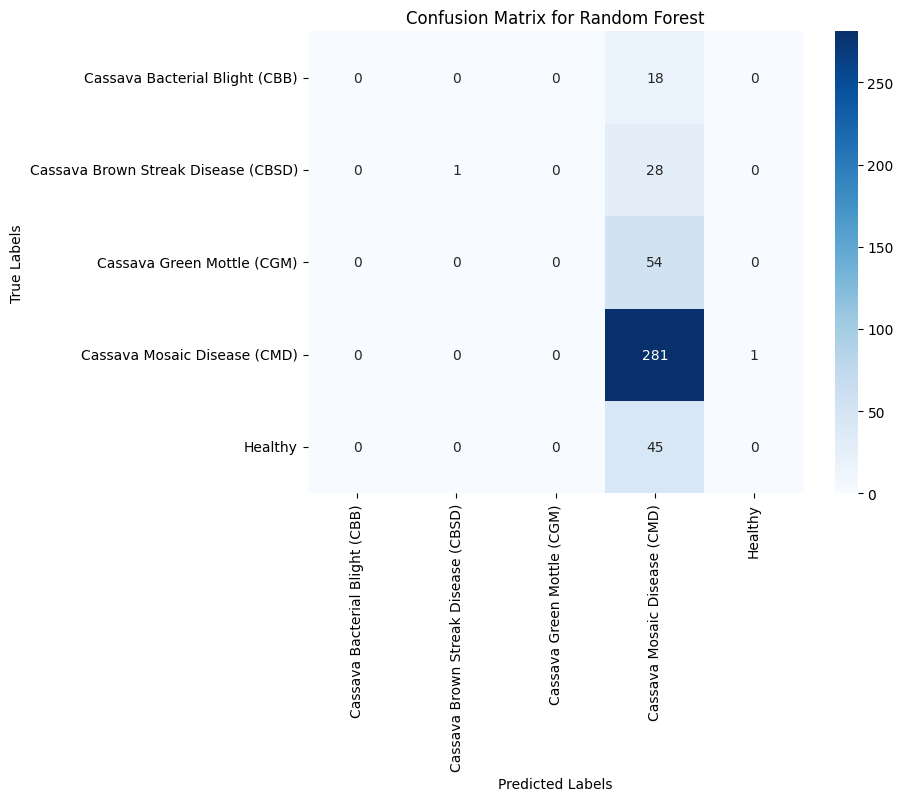

In [43]:


def load_images(image_paths, img_size=128):
    images = []
    for img_path in image_paths:
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Read image in grayscale
        if img is None:
            print(f"Image not found: {img_path}")
            continue  # Skip if image is missing
        img = cv2.resize(img, (img_size, img_size))  # Resize image
        img = img.flatten()  # Flatten into a 1D array
        images.append(img)
    return np.array(images)

# Ensure that X contains numeric data
X = load_images(image_paths, Img_size)

# Load and preprocess images
X = load_images(image_paths, Img_size)
y = labels

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the KNN model
knn.fit(X_train, y_train)
rf.fit(X_train, y_train)
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_map.values(), yticklabels=label_map.values())
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()
# Evaluate the KNN model
print("Evaluating KNN Model:")
y_pred_knn = knn.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_knn,zero_division=1))
plot_confusion_matrix(y_test, y_pred_knn, "KNN")

# Evaluate the Random Forest model
print("\nEvaluating Random Forest Model:")
y_pred_rf = rf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_rf,zero_division=1))
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")